In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for 2022-2023
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365*2)]

# Define channels with specific characteristics
channels = {
    'Facebook': {'trend': 1.2, 'seasonality': 0.3, 'volatility': 0.15},
    'Google Ads': {'trend': 0.9, 'seasonality': 0.1, 'volatility': 0.1},
    'TikTok': {'trend': 1.8, 'seasonality': 0.4, 'volatility': 0.25},
    'Instagram': {'trend': 1.5, 'seasonality': 0.3, 'volatility': 0.2},
    'YouTube': {'trend': 1.1, 'seasonality': 0.2, 'volatility': 0.15},
    'Twitter': {'trend': 0.7, 'seasonality': 0.2, 'volatility': 0.3}
}

# Define campaign-specific characteristics
campaign_characteristics = {
    'Brand_Awareness': {
        'base_impressions_mult': 2.0,  # Higher impressions
        'conversion_rate_mult': 0.3,   # Much lower conversion rate
        'install_rate_mult': 0.1,      # Very low install rate
        'cost_mult': 0.7               # Lower cost per click
    },
    'Lead_Generation': {
        'base_impressions_mult': 1.0,
        'conversion_rate_mult': 1.2,
        'install_rate_mult': 0.8,
        'cost_mult': 1.1
    },
    'App_Install': {
        'base_impressions_mult': 0.8,
        'conversion_rate_mult': 1.0,
        'install_rate_mult': 1.5,
        'cost_mult': 1.2
    },
    'Retargeting': {
        'base_impressions_mult': 0.6,
        'conversion_rate_mult': 1.8,
        'install_rate_mult': 1.2,
        'cost_mult': 1.3
    },
    'Promotional': {
        'base_impressions_mult': 1.2,
        'conversion_rate_mult': 1.4,
        'install_rate_mult': 0.9,
        'cost_mult': 1.0
    }
}

campaign_types = list(campaign_characteristics.keys())
regions = ['US_West', 'US_East', 'EU', 'APAC', 'LATAM']

def apply_trend(base_value, month_index, channel_params):
    trend_factor = 1 + (month_index * 0.02 * channel_params['trend'])
    return max(0, base_value * trend_factor)

def apply_seasonality(value, month, channel_params):
    # Enhanced seasonality effects
    season_factor = 1.0
    
    # Major holiday season (Nov-Dec)
    if month == 12:
        season_factor = 2.0 + channel_params['seasonality']
    elif month == 11:
        season_factor = 1.7 + channel_params['seasonality']
    # Post-holiday slump (Jan-Feb)
    elif month == 1:
        season_factor = 0.6
    elif month == 2:
        season_factor = 0.7
    # Summer lull (Jun-Aug)
    elif month in [6, 7, 8]:
        season_factor = 0.8
    # Spring campaign season (Mar-May)
    elif month in [3, 4, 5]:
        season_factor = 1.3
    # Back to school (Sep)
    elif month == 9:
        season_factor = 1.4
    # Pre-holiday build-up (Oct)
    elif month == 10:
        season_factor = 1.5
        
    return max(0, value * season_factor)

def add_market_shock(value, date, channel_params):
    if np.random.random() < 0.05:
        shock_factor = max(0.5, np.random.normal(1, channel_params['volatility']))
        return max(0, value * shock_factor)
    return value

data = []
for date in dates:
    month_index = (date.year - 2022) * 12 + date.month - 1
    
    for channel in channels:
        channel_params = channels[channel]
        
        for campaign_type in campaign_types:
            campaign_params = campaign_characteristics[campaign_type]
            
            for region in regions:
                if np.random.random() > 0.6:
                    # Base metrics adjusted by campaign type
                    base_impressions = max(100, np.random.normal(1000, 300) * campaign_params['base_impressions_mult'])
                    
                    # Apply channel-specific trends and seasonality
                    base_impressions = apply_trend(base_impressions, month_index, channel_params)
                    base_impressions = apply_seasonality(base_impressions, date.month, channel_params)
                    base_impressions = add_market_shock(base_impressions, date, channel_params)
                    
                    # Campaign-specific conversion rates
                    base_conv_rate = max(0.01, min(0.3, np.random.normal(
                        0.08 * channel_params['trend'],
                        0.02 * channel_params['volatility']
                    ))) * campaign_params['conversion_rate_mult']
                    
                    clicks = max(1, int(base_impressions * base_conv_rate))
                    
                    # Adjust conversion and install rates by campaign type
                    conversion_rate = max(0.01, min(0.3, np.random.normal(0.1, 0.02))) * campaign_params['conversion_rate_mult']
                    conversions = max(0, int(clicks * conversion_rate))
                    
                    install_rate = max(0.1, min(0.9, np.random.normal(0.8, 0.1))) * campaign_params['install_rate_mult']
                    installs = max(0, int(conversions * install_rate))
                    
                    # Adjust costs by campaign type
                    cost_per_click = max(0.1, np.random.normal(0.5, 0.15) * channel_params['trend'] * campaign_params['cost_mult'])
                    cost = max(0, clicks * cost_per_click)
                    
                    revenue_per_conversion = max(10, np.random.normal(50, 10))
                    revenue = max(0, conversions * revenue_per_conversion)
                    
                    month_year = date.strftime('%Y-%m')
                    
                    row = {
                        'month_year': month_year,
                        'Channel': channel,
                        'Campaign_Type': campaign_type,
                        'Region': region,
                        'Impressions': int(base_impressions),
                        'Clicks': clicks,
                        'Conversions': conversions,
                        'Installs': installs,
                        'Cost': round(cost, 2),
                        'Revenue': round(revenue, 2),
                        'Profit': round(revenue - cost, 2)
                    }
                    data.append(row)

# Create DataFrame
mktg = pd.DataFrame(data)

# Save to CSV
mktg.to_csv('marketing_performance_2022_2023.csv', index=False)

mktg.columns = mktg.columns.str.lower()

# Print some statistics to verify the changes
print("\nBrand Awareness Campaign Stats:")
print(mktg[mktg['campaign_type'] == 'Brand_Awareness'].describe())

print("\nMonthly Impressions:")
print(mktg.groupby('month_year')['impressions'].mean())


Brand Awareness Campaign Stats:
        impressions       clicks  conversions     installs         cost  \
count   8799.000000  8799.000000  8799.000000  8799.000000  8799.000000   
mean    3212.462666    94.257188     2.328105     0.004887    44.341842   
std     1893.014729    71.129542     2.292683     0.069739    48.219865   
min       97.000000     2.000000     0.000000     0.000000     0.330000   
25%     1842.500000    45.000000     1.000000     0.000000    14.185000   
50%     2745.000000    74.000000     2.000000     0.000000    28.050000   
75%     4130.500000   119.000000     3.000000     0.000000    55.865000   
max    18232.000000   812.000000    22.000000     1.000000   524.480000   

           revenue       profit  
count  8799.000000  8799.000000  
mean    116.442984    72.101182  
std     119.698654    86.211363  
min       0.000000   -85.200000  
25%      45.555000    21.970000  
50%      83.440000    47.750000  
75%     153.390000    98.620000  
max    1274.350000 

In [31]:
agg_mktg = mktg.groupby('month_year').agg({'impressions': 'sum', 'clicks': 'sum', 'conversions': 'sum', 'installs': 'sum', 'cost': 'sum', 'revenue': 'sum', 'profit': 'sum'}).reset_index()
agg_mktg

,month_year,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,1229907,111710,13148,9999,80135.05,658333.50,578198.54
1,2022-02,1364580,124192,14680,11223,87487.49,735905.60,648418.01
2,2022-03,2905759,263107,31952,25139,184415.09,1588915.86,1404500.48
3,2022-04,2864055,263423,32033,25235,186490.34,1602158.32,1415668.06
4,2022-05,2929182,270755,33026,25915,194151.79,1649360.06,1455207.99
5,2022-06,1778250,165700,19915,15322,118368.98,991568.38,873199.60
6,2022-07,1924721,177572,21480,16650,126121.40,1062646.73,936525.56
7,2022-08,1996572,182228,21778,16660,129035.25,1100979.30,971944.05
8,2022-09,3428225,313628,38179,29604,224879.52,1891571.33,1666692.13
9,2022-10,3792286,354122,43742,34480,257545.78,2178968.08,1921422.12


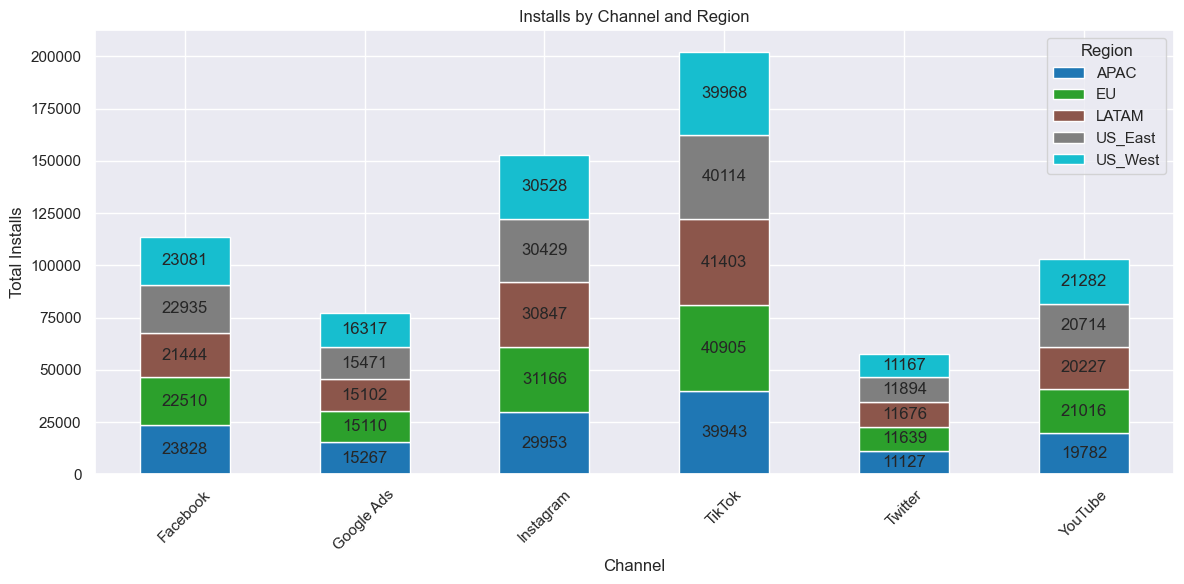

In [24]:

# Aggregate installs by channel and region
aggregated_installs = mktg.groupby(['channel', 'region'], as_index=False)['installs'].sum()

# Pivot the data for stacking
pivot_data = aggregated_installs.pivot(index='channel', columns='region', values='installs').fillna(0)

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Add install counts in each box
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Formatting
plt.title("Installs by Channel and Region")
plt.xlabel("Channel")
plt.ylabel("Total Installs")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_8102/1850318820.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11'),
 Text(23, 0, '2023-12')]

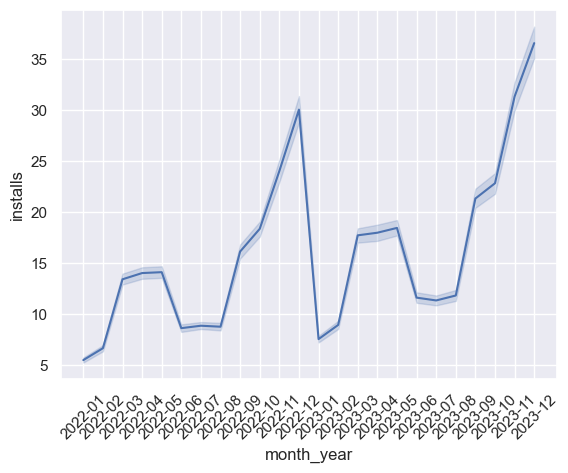

In [32]:
sns.set_theme(style="darkgrid")

# Create a bar plot
g = sns.lineplot(data=mktg, x='month_year', y='installs')
# Rotate the x-axis labels by 45 degrees
g.set_xticklabels(g.get_xticklabels(), rotation=45)


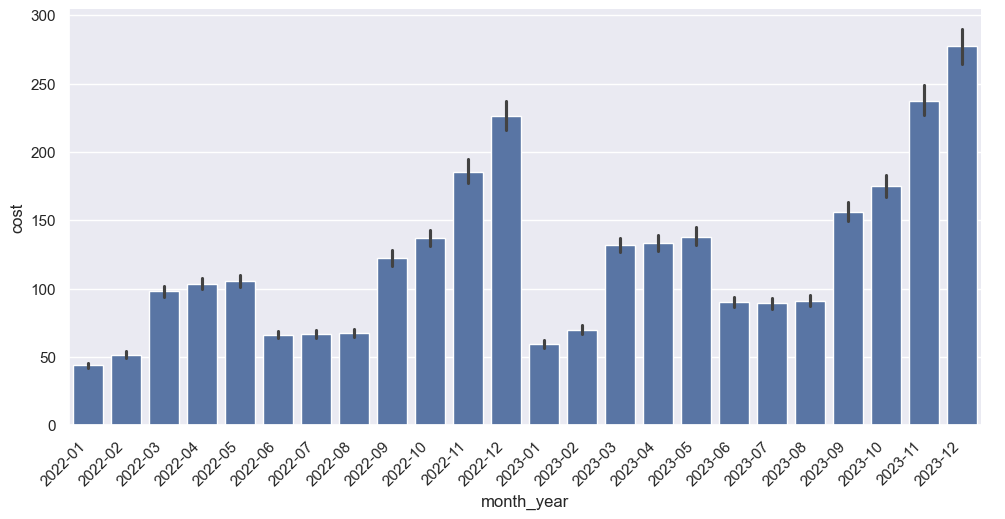

In [26]:
# Your existing code
plot = sns.catplot(data=mktg, x='month_year', y='cost', kind='bar', height=5, aspect=2)

# Rotate x-axis labels
plot.set_xticklabels(rotation=45, ha='right')

# Show the plot
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

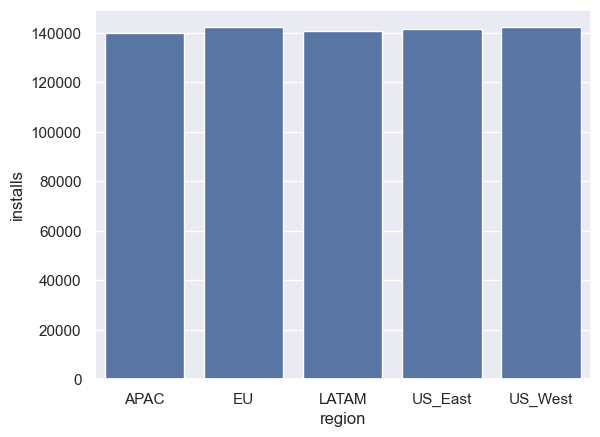

In [28]:
# Aggregate installs by region
aggregated_data = mktg.groupby('region')['installs'].sum().reset_index()

# Set the theme
sns.set_theme(style="darkgrid")

# Create a bar plot
sns.barplot(data=aggregated_data, x='region', y='installs')

# Show the plot
sns.plt.show()

<Figure size 1500x1000 with 0 Axes>

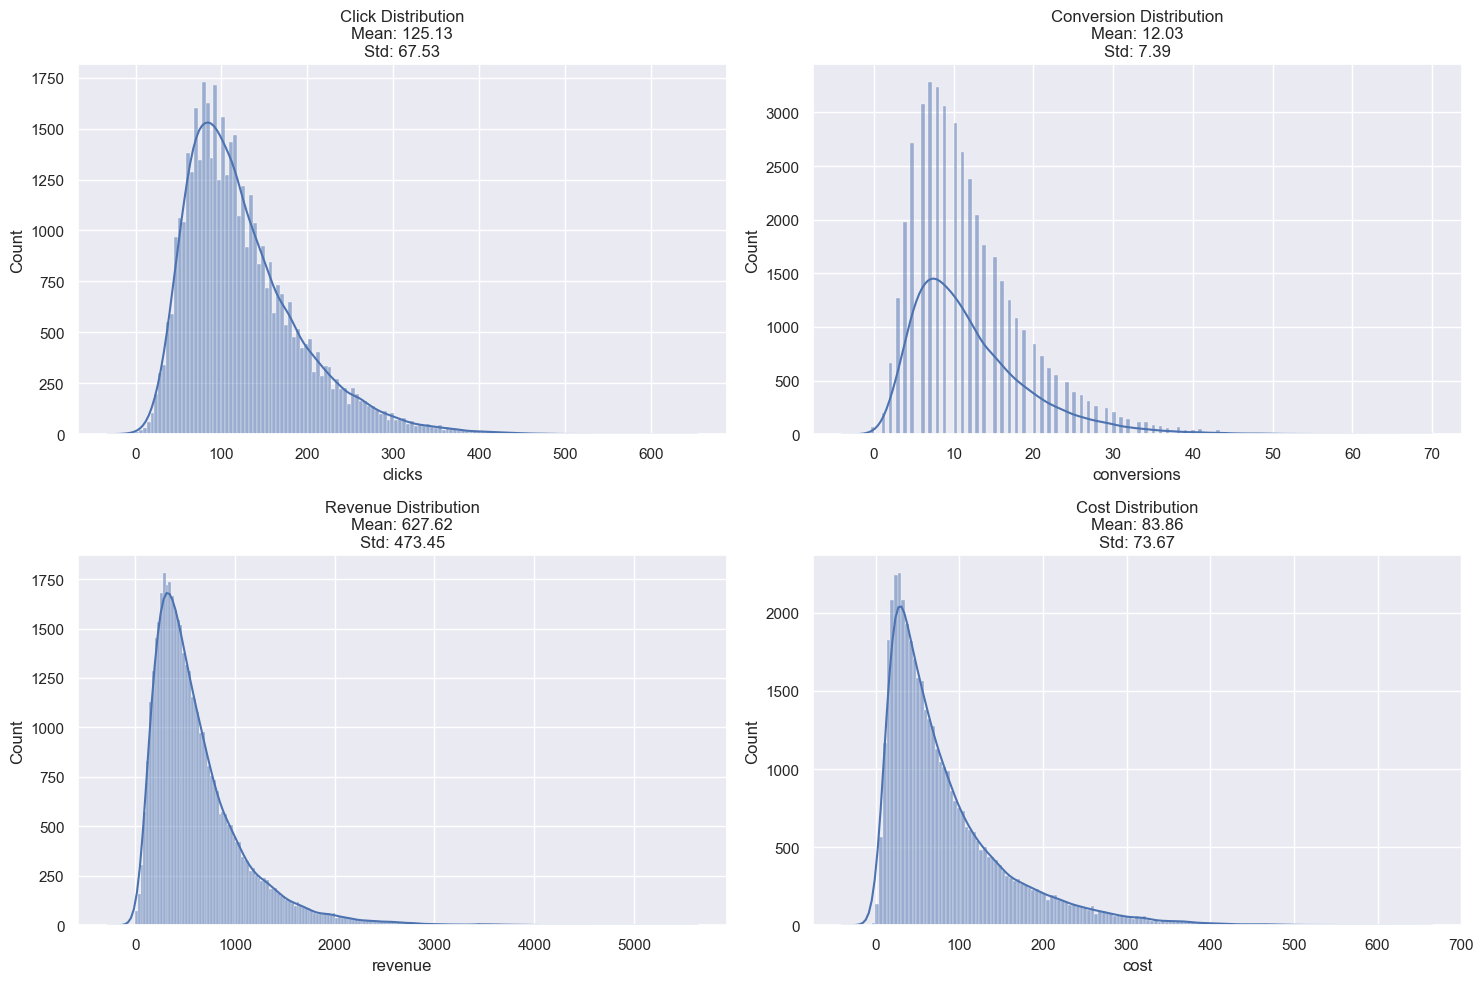

In [39]:
# Distribution Analysis
plt.figure(figsize=(15, 10))

# Create subplot grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribution plots with statistical info
sns.histplot(data=mktg, x='clicks', kde=True, ax=ax1)
ax1.set_title(f'Click Distribution\nMean: {mktg.clicks.mean():.2f}\nStd: {mktg.clicks.std():.2f}')

sns.histplot(data=mktg, x='conversions', kde=True, ax=ax2)
ax2.set_title(f'Conversion Distribution\nMean: {mktg.conversions.mean():.2f}\nStd: {mktg.conversions.std():.2f}')

sns.histplot(data=mktg, x='revenue', kde=True, ax=ax3)
ax3.set_title(f'Revenue Distribution\nMean: {mktg.revenue.mean():.2f}\nStd: {mktg.revenue.std():.2f}')

sns.histplot(data=mktg, x='cost', kde=True, ax=ax4)
ax4.set_title(f'Cost Distribution\nMean: {mktg.cost.mean():.2f}\nStd: {mktg.cost.std():.2f}')

plt.tight_layout()

# Distribution Shape

- **Right-Skewed Distribution**:  
  The data shows a right-skewed (positively skewed) distribution.  
  - Most clicks fall between **0-200**, with the **peak around 100** clicks.  
  - A long "tail" extends to the right, indicating some campaigns achieve much higher clicks (up to **600**).

---

# Key Statistics

- **Mean (average)**: **125.13 clicks**  
- **Standard Deviation**: **67.53 clicks**

### Interpretation:
- **68% of campaigns** fall between:
  - **58 clicks**: \(125 - 67\)
  - **193 clicks**: \(125 + 67\)
- Campaigns outside this range might be:
  - **Underperforming** or
  - **Exceptionally successful**

---

# Practical Interpretation

- The **most common outcome**: Around **100 clicks** per campaign.
- **Very few campaigns** achieve more than **400 clicks**.
- Use the following ranges to classify performance:
  - **Below 58 clicks**: Underperforming
  - **58-193 clicks**: Normal performance range
  - **Above 193 clicks**: Exceptionally good performance

---

# Business Insights

- **Set Realistic Goals**:
  - Use this data to establish achievable benchmarks for campaigns.
- **Optimization Opportunities**:
  - Focus on campaigns with **less than 58 clicks** for potential improvements.
- **Learn from Outliers**:
  - Analyze high-performing campaigns (**300+ clicks**) to replicate their success.
- **Performance Benchmarks**:
  - Use these ranges to set targets for future campaigns.

Text(0.5, 1.0, 'Correlation Matrix of Key Metrics')

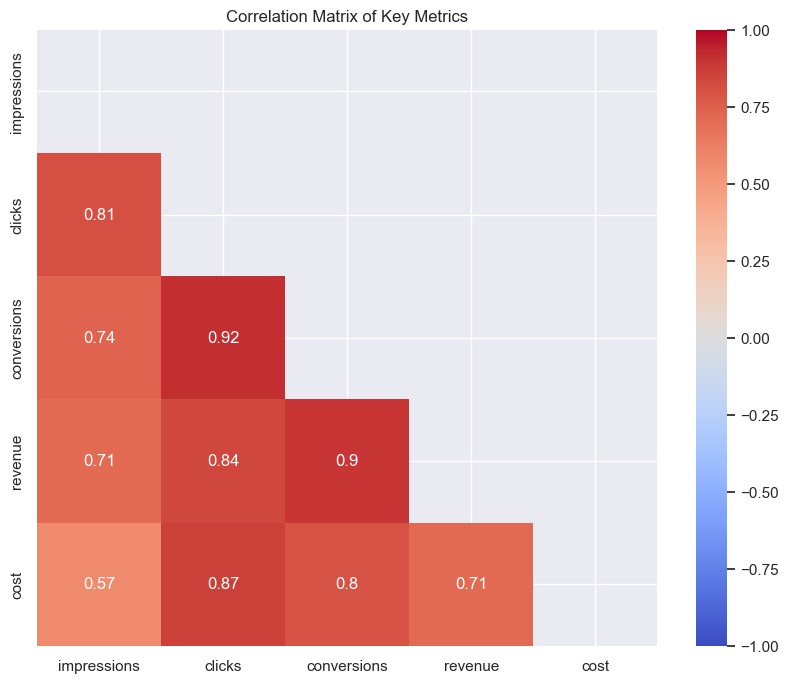

In [40]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = mktg[['impressions', 'clicks', 'conversions', 'revenue', 'cost']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Metrics')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Google Ads'),
  Text(2, 0, 'TikTok'),
  Text(3, 0, 'Instagram'),
  Text(4, 0, 'YouTube'),
  Text(5, 0, 'Twitter')])

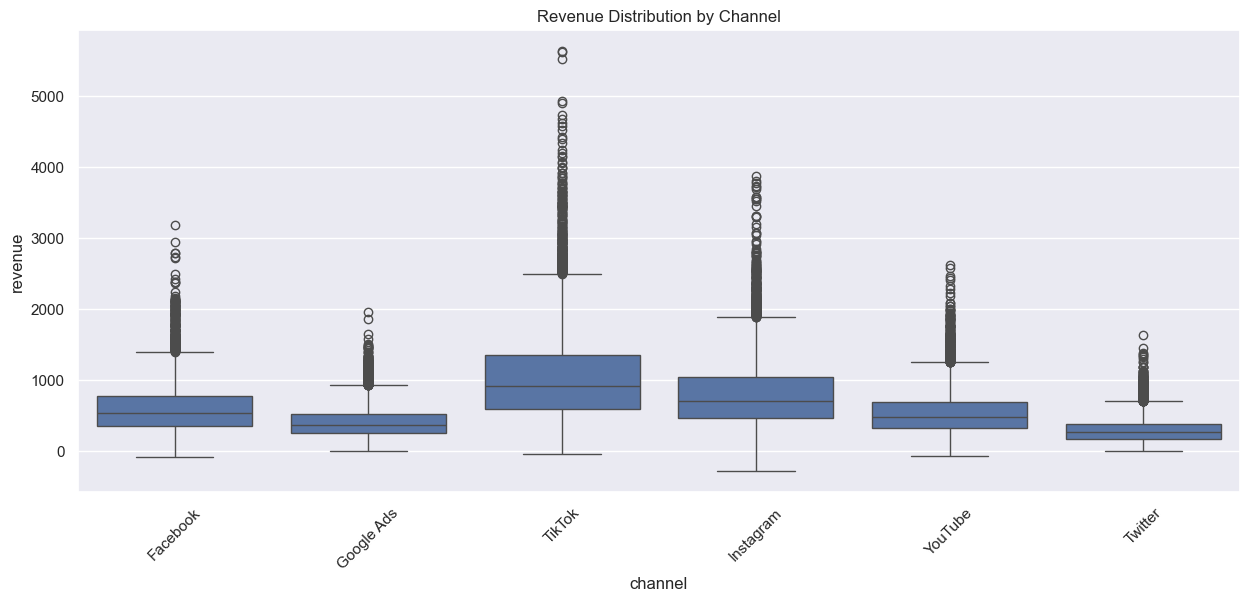

In [41]:
# 3. Channel Performance Box Plots
plt.figure(figsize=(15, 6))
sns.boxplot(x='channel', y='revenue', data=mktg)
plt.title('Revenue Distribution by Channel')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Revenue')

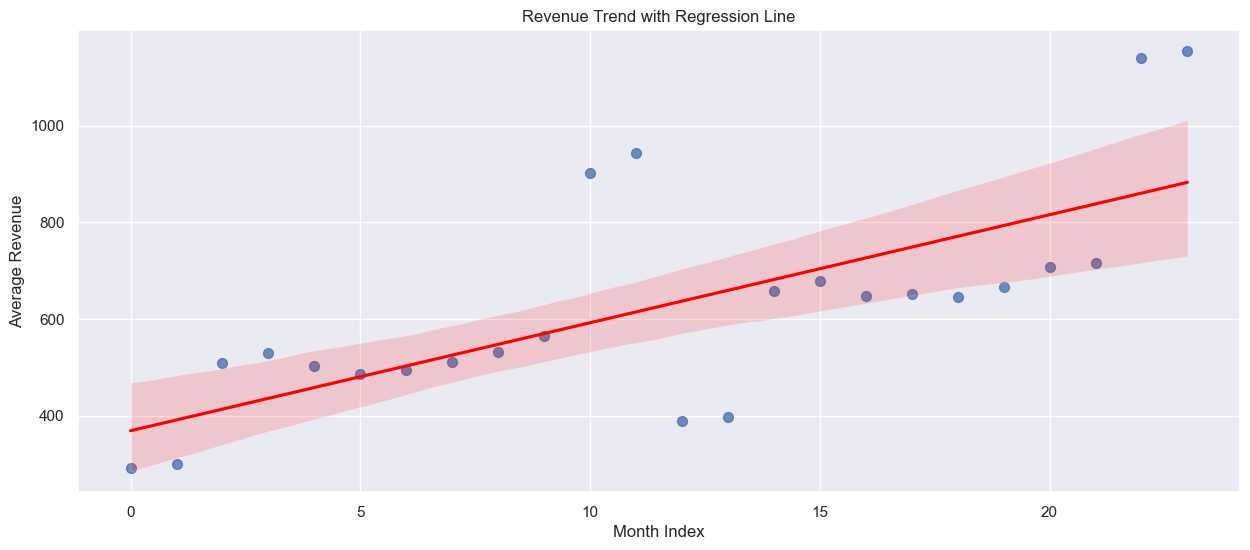

In [42]:
# 4. Time Series Analysis
# Convert month_year to datetime
agg_mktg['month_year'] = pd.to_datetime(mktg['month_year'])

# Create time series plot with confidence intervals
plt.figure(figsize=(15, 6))
sns.regplot(x=np.arange(len(mktg['month_year'].unique())), 
            y=mktg.groupby('month_year')['revenue'].mean(),
            scatter_kws={'s': 50},
            line_kws={'color': 'red'})
plt.title('Revenue Trend with Regression Line')
plt.xlabel('Month Index')
plt.ylabel('Average Revenue')

In [43]:
# 5. Statistical Tests and Channel Comparison
def channel_statistics(data):
    # Perform one-way ANOVA test
    channels = data['channel'].unique()
    channel_groups = [data[data['channel'] == channel]['revenue'] for channel in channels]
    f_stat, p_value = stats.f_oneway(*channel_groups)
    
    # Create summary statistics
    summary = data.groupby('channel').agg({
        'revenue': ['mean', 'std', 'count'],
        'conversions': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(2)
    
    return summary, f_stat, p_value

# Assuming df is your DataFrame
summary_stats, f_stat, p_value = channel_statistics(mktg)
print("\nChannel Performance Statistics:")
print(summary_stats)
print(f"\nOne-way ANOVA test results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Channel Performance Statistics:
            revenue               conversions          cost       
               mean     std count        mean   std    mean    std
channel                                                           
Facebook     612.80  358.69  7177       11.79  5.09   73.83  35.33
Google Ads   419.13  224.35  7279        8.17  3.34   38.91  17.68
Instagram    815.91  479.24  7249       15.61  6.75  120.48  57.55
TikTok      1056.51  651.81  7432       20.08  9.21  184.97  92.49
Twitter      306.58  179.38  7373        5.94  2.64   22.70  10.70
YouTube      551.03  316.29  7329       10.55  4.45   61.08  28.07

One-way ANOVA test results:
F-statistic: 3398.08
p-value: 0.0000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Google Ads'),
  Text(2, 0, 'TikTok'),
  Text(3, 0, 'Instagram'),
  Text(4, 0, 'YouTube'),
  Text(5, 0, 'Twitter')])

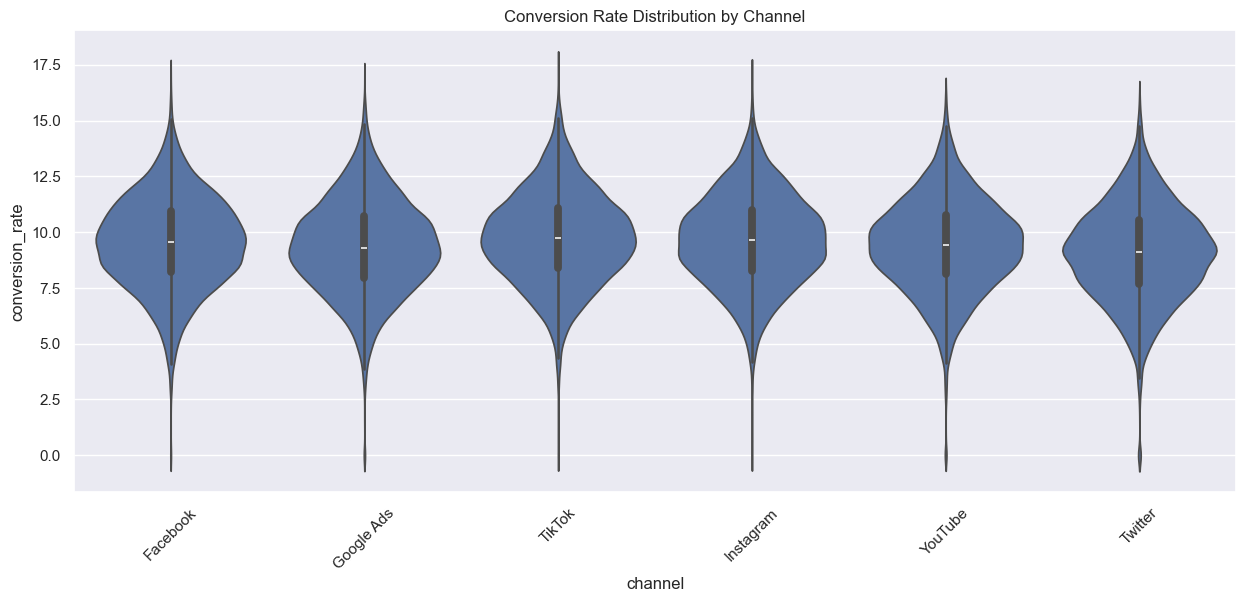

In [44]:
# 6. Conversion Rate Analysis
plt.figure(figsize=(15, 6))
mktg['conversion_rate'] = mktg['conversions'] / mktg['clicks'] * 100

sns.violinplot(x='channel', y='conversion_rate', data=mktg)
plt.title('Conversion Rate Distribution by Channel')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'App_Install'),
  Text(1, 0, 'Brand_Awareness'),
  Text(2, 0, 'Lead_Generation'),
  Text(3, 0, 'Promotional'),
  Text(4, 0, 'Retargeting')])

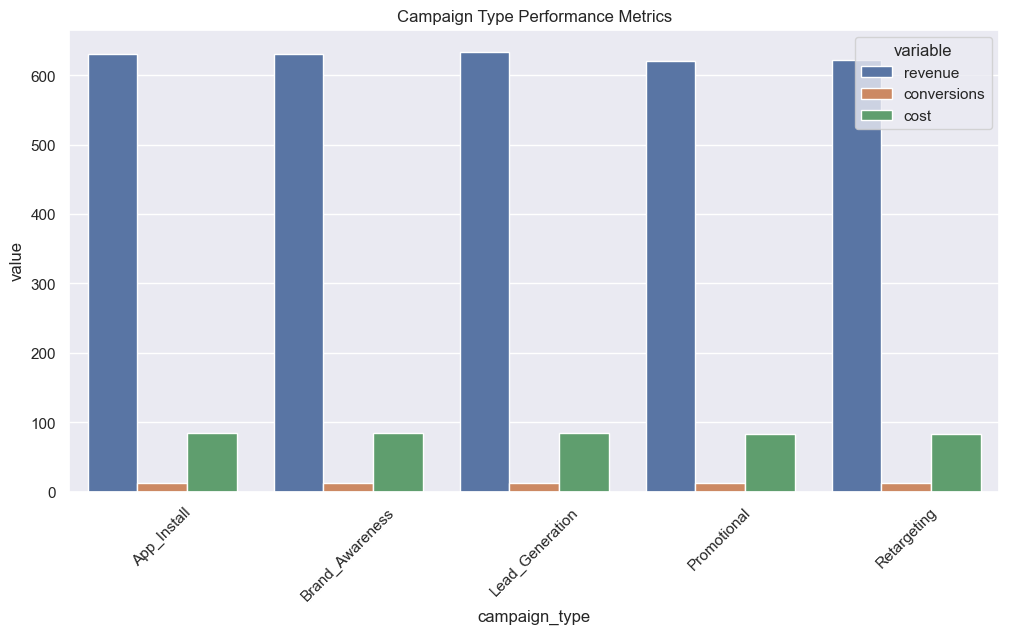

In [45]:
# 7. Campaign Type Performance
plt.figure(figsize=(12, 6))
campaign_performance = mktg.groupby('campaign_type').agg({
    'revenue': 'mean',
    'conversions': 'mean',
    'cost': 'mean'
}).reset_index()

campaign_performance_melted = pd.melt(campaign_performance, 
                                    id_vars=['campaign_type'],
                                    value_vars=['revenue', 'conversions', 'cost'])

sns.barplot(x='campaign_type', y='value', hue='variable', data=campaign_performance_melted)
plt.title('Campaign Type Performance Metrics')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'US_East'),
  Text(1, 0, 'EU'),
  Text(2, 0, 'US_West'),
  Text(3, 0, 'APAC'),
  Text(4, 0, 'LATAM')])

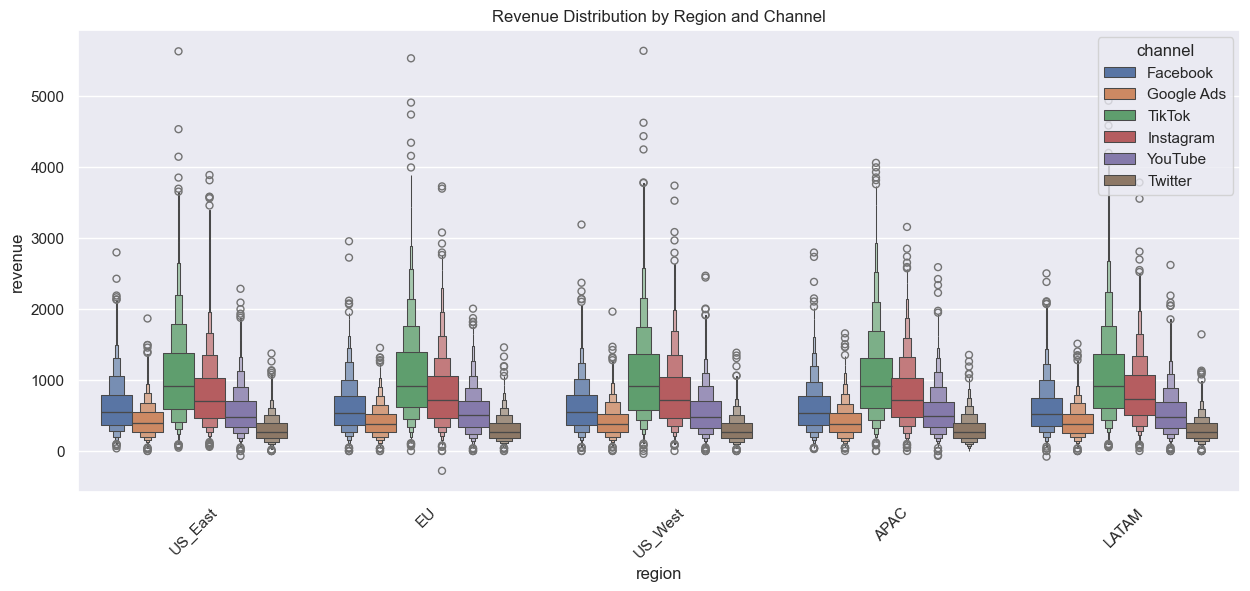

In [46]:
# 8. Regional Performance Analysis
plt.figure(figsize=(15, 6))
sns.boxenplot(x='region', y='revenue', hue='channel', data=mktg)
plt.title('Revenue Distribution by Region and Channel')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Cost vs Revenue by Channel')

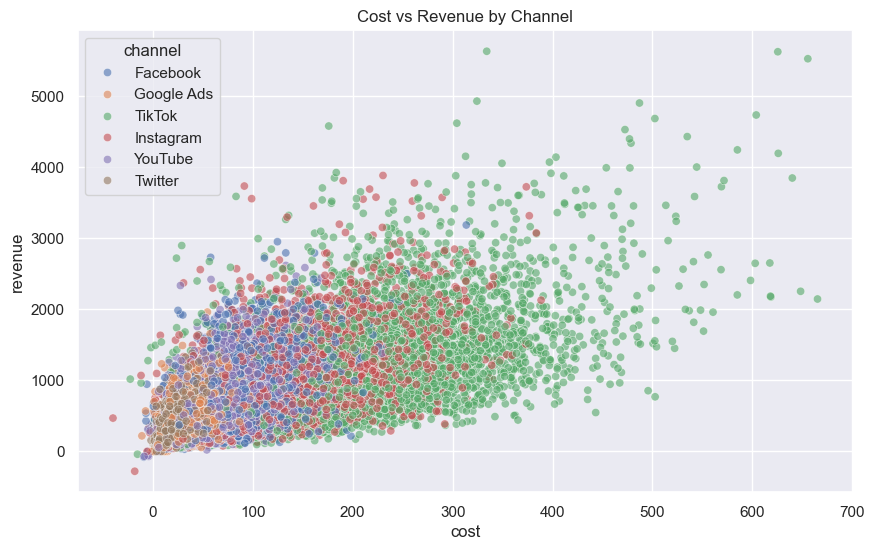

In [47]:
# 9. Cost-Revenue Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mktg, x='cost', y='revenue', hue='channel', alpha=0.6)
plt.title('Cost vs Revenue by Channel')

<Axes: xlabel='cost', ylabel='revenue'>

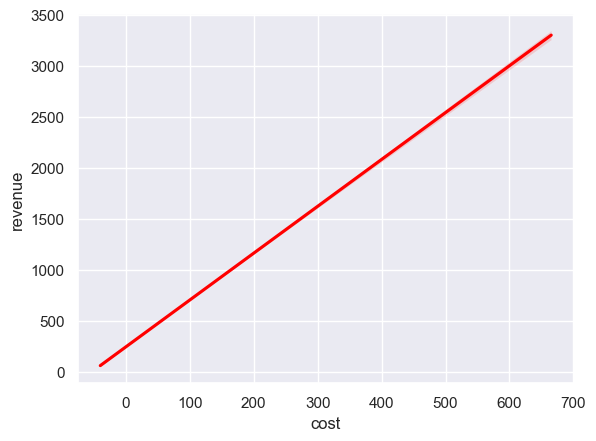

In [48]:
# Adding regression line
sns.regplot(data=mktg, x='cost', y='revenue', scatter=False, color='red')


In [53]:
mktg.head(5)


,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit,conversion_rate
0,2022-01,Facebook,App_Install,US_East,1086,109,11,9,54.00,344.56,290.56,10.091743
1,2022-01,Facebook,Brand_Awareness,EU,793,74,9,6,45.30,225.24,179.94,12.162162
2,2022-01,Facebook,Lead_Generation,US_West,746,73,6,5,43.62,165.58,121.95,8.219178
3,2022-01,Facebook,Lead_Generation,EU,1134,104,16,14,66.49,658.76,592.26,15.384615
4,2022-01,Facebook,Lead_Generation,APAC,878,83,9,6,29.68,259.52,229.84,10.843373


In [56]:
mktg_aggregated = mktg.groupby('channel').agg(sum_of_installs=('installs', 'sum')).reset_index()
mktg_aggregated.head()

,channel,sum_of_installs
0,Facebook,64128
1,Google Ads,43959
2,Instagram,86633
3,TikTok,115617
4,Twitter,31285


In [34]:
mktg['ctr'] = (mktg['clicks'] / mktg['impressions']).round(2)
mktg.head(5)

,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit,ctr
0,2022-01,Facebook,App_Install,US_East,1086,109,11,9,54.00,344.56,290.56,0.10
1,2022-01,Facebook,Brand_Awareness,EU,793,74,9,6,45.30,225.24,179.94,0.09
2,2022-01,Facebook,Lead_Generation,US_West,746,73,6,5,43.62,165.58,121.95,0.10
3,2022-01,Facebook,Lead_Generation,EU,1134,104,16,14,66.49,658.76,592.26,0.09
4,2022-01,Facebook,Lead_Generation,APAC,878,83,9,6,29.68,259.52,229.84,0.09


In [15]:
mktg.sort_values(['cost','revenue'],ascending=[True, False]).head(5)

,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit
36648,2023-09,Instagram,Lead_Generation,LATAM,1543,184,11,8,-40.08,469.01,509.09
26931,2023-03,TikTok,Lead_Generation,APAC,2175,300,29,21,-22.77,1018.13,1040.90
20690,2022-12,Instagram,Retargeting,EU,-276,-33,-4,-3,-18.30,-279.45,-261.15
18229,2022-10,TikTok,App_Install,US_West,-138,-18,-1,0,-15.56,-39.82,-24.26
38829,2023-10,Instagram,Promotional,LATAM,1686,225,17,17,-11.98,1069.38,1081.36


([0, 1, 2, 3, 4],
 [Text(0, 0, 'App_Install'),
  Text(1, 0, 'Brand_Awareness'),
  Text(2, 0, 'Lead_Generation'),
  Text(3, 0, 'Promotional'),
  Text(4, 0, 'Retargeting')])

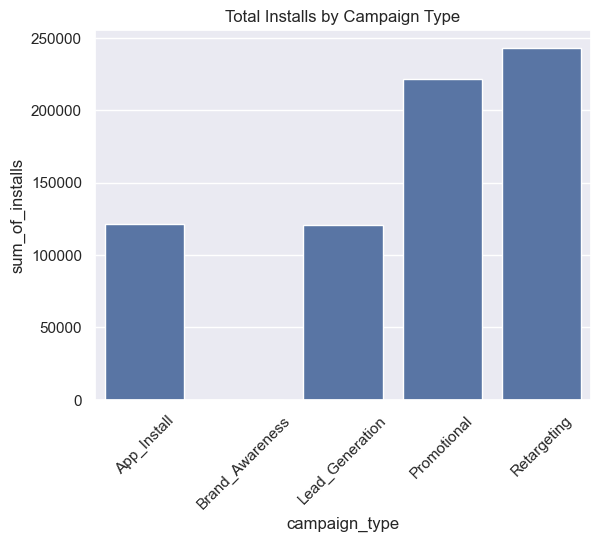

In [40]:
mktg_install = mktg.groupby('campaign_type').agg(sum_of_installs=('installs', 'sum')).reset_index()
sns.barplot(data=mktg_install, x='campaign_type', y='sum_of_installs')
plt.title('Total Installs by Campaign Type')
plt.xticks(rotation=45)

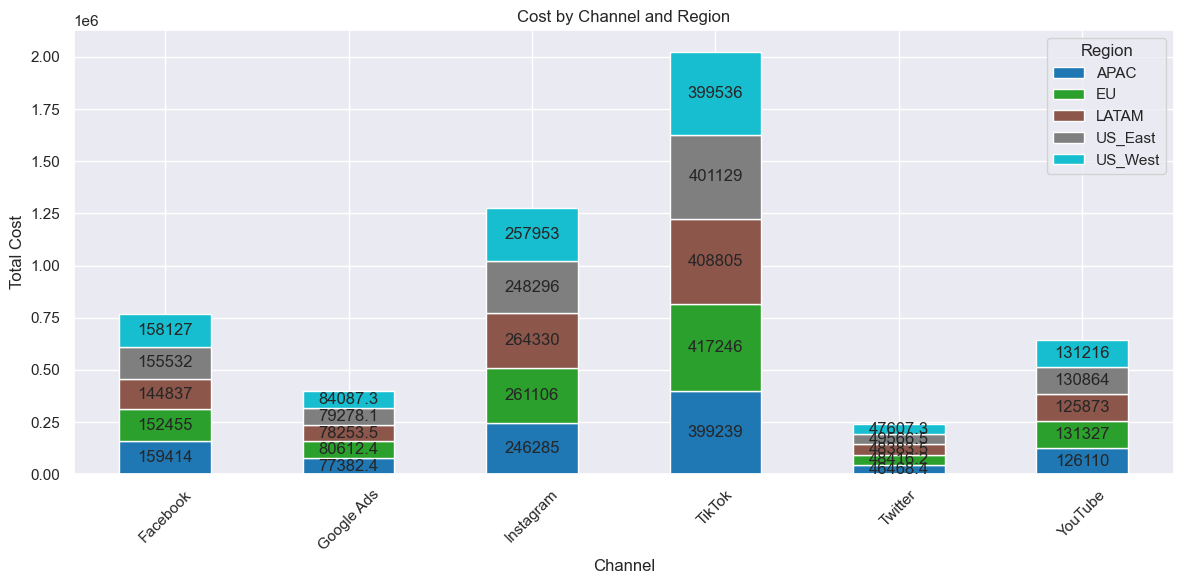

In [43]:

# Aggregate installs by channel and region
aggregated_installs = mktg.groupby(['channel', 'region'], as_index=False)['cost'].sum()

# Pivot the data for stacking
pivot_data = aggregated_installs.pivot(index='channel', columns='region', values='cost').fillna(0)

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Add install counts in each box
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Formatting
plt.title("Cost by Channel and Region")
plt.xlabel("Channel")
plt.ylabel("Total Cost")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()

# Show the plot
plt.show()

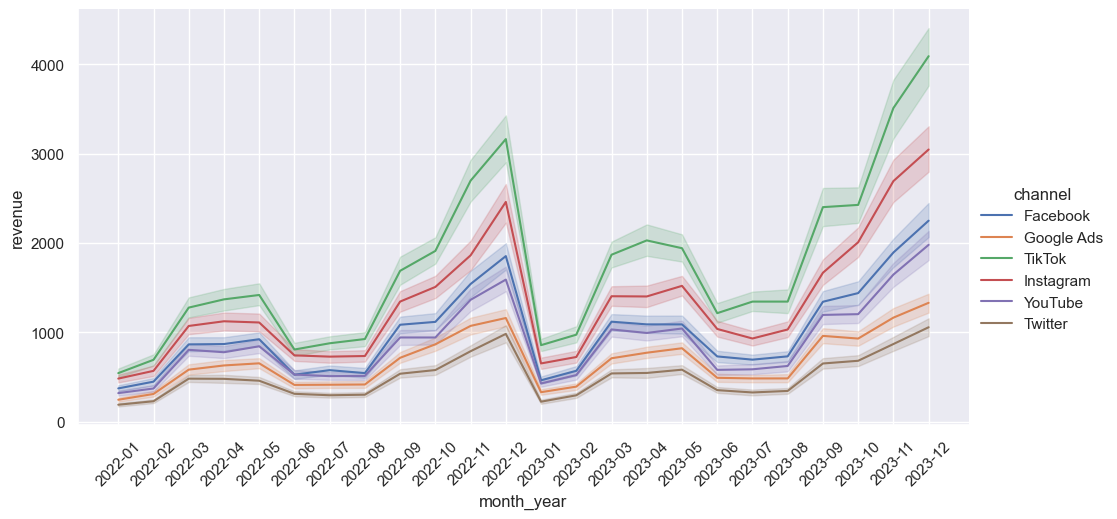

In [49]:
sns.relplot(data=mktg, x='month_year', y='revenue', kind='line', hue='channel', height=5, aspect=2)
plt.xticks(rotation=45)
plt.show()

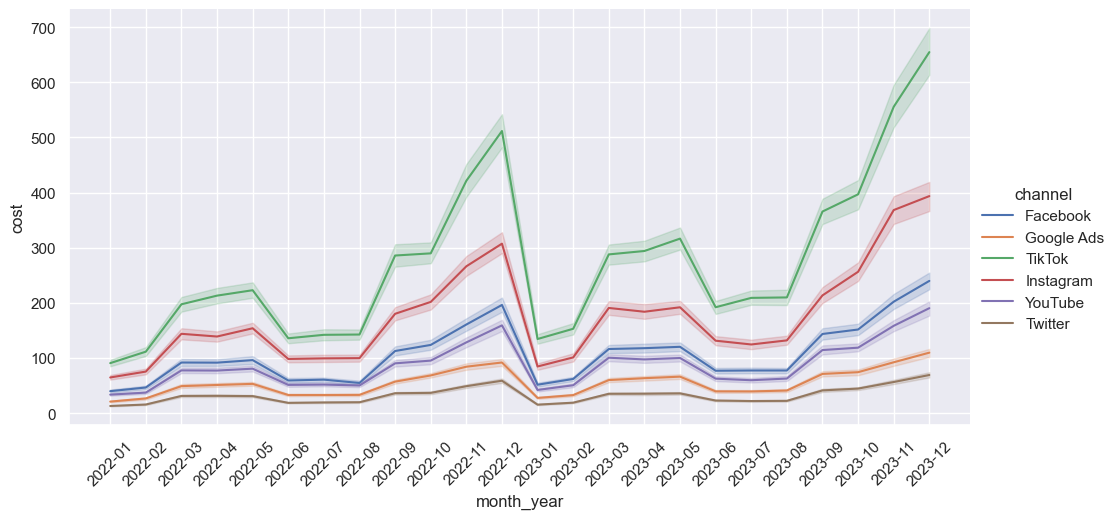

In [50]:
sns.relplot(data=mktg, x='month_year', y='cost', kind='line', hue='channel', height=5, aspect=2)
plt.xticks(rotation=45)
plt.show()

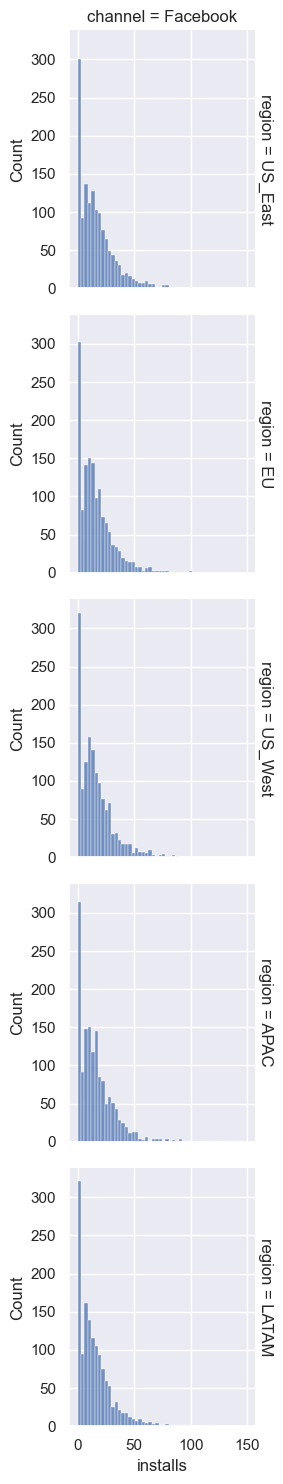

In [60]:
# Assuming mktg is your DataFrame
# Filter the data for the channel "Facebook"
filtered_data = mktg.query('channel == "Facebook"')

# Set the theme
sns.set_theme(style="darkgrid")

# Plot the filtered data
sns.displot(
    filtered_data, x="installs", col="channel", row="region",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)